<a href="https://colab.research.google.com/github/GabrielaGuayara/Open-Data-Bootcamp/blob/main/Food_Scrap_Drop_Off.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Downloading 'Food_Scrap_Drop-Off_Locations_in_NYC.csv' from Google Drive
!gdown 1LUl8ZtGPQ2MAhJ_2Nth4QMJ8SeYhB-mo -O Food_Scrap_Drop-Off_Locations_in_NYC.csv


In [4]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


# **Import required packages**

In [5]:
#Import libraries
#For cleaning data

import numpy as np
import pandas as pd
import requests as re
import seaborn as sns
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

#For visualiazing data
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt

# **About the data set**

# Context

 New York City is producing more than 14 million tons of trash every year. Much of this trash ends up in landfills, causing methane emissions that pollute the water and the air. The selected data set named "Food Scrap Drop-Off Locations in NYC" will be used to  analyze the accessibility and distribution of food scrap drop-off locations across different neighborhoods in NYC, providing insights into areas that may require additional facilities or outreach efforts to promote composting and reduce food waste.


# Metadata
| Column Name   | Description                                            |
| ------------- | ---------------------------------------------          |
|Borough        | Borough's name in NYC                                  |
|NTAName        | A way to sort people into groups                       |
|SiteName       | Name of each site location in NYC                      |
|SiteAddr       | Address of each sile location in NYC                   |
|Hosted_by      | Name of the individual who hosted the drop-off site    |
|Open_Month     | Anually working hours per moth                         |
|Day_Hours      | Working hours per day                                  |
|Notes          | Notes about the type of food accepted in each location |
|Website        | Website of each drop-off location                      |
|BoroCD         | Borough Code                                           |
|CouncilDis     | NYC Council Distric Number                             |
|Longitude      | Longitude                                              |
|Latitude       | Latitude                                               |
|Object ID      | Unique ID of each drop-off location                    |
|Location point | Accurate address using longitude and latitude          |



In [6]:
#loading data -setting df to our data
df = pd.read_csv("Food_Scrap_Drop-Off_Locations_in_NYC.csv")

In [7]:
df.info() #displaying our information # DataFrame metadata

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Borough         479 non-null    object 
 1   NTAName         479 non-null    object 
 2   SiteName        479 non-null    object 
 3   SiteAddr        238 non-null    object 
 4   Hosted_By       474 non-null    object 
 5   Open_Month      479 non-null    object 
 6   Day_Hours       479 non-null    object 
 7   Notes           469 non-null    object 
 8   Website         445 non-null    object 
 9   BoroCD          479 non-null    int64  
 10  CouncilDis      479 non-null    int64  
 11  ct2010          12 non-null     float64
 12  BBL             5 non-null      float64
 13  BIN             5 non-null      float64
 14  Latitude        238 non-null    float64
 15  Longitude       238 non-null    float64
 16  PolicePrec      479 non-null    int64  
 17  Object ID       479 non-null    int

In [8]:
print(df.shape)#check the dimensionality of the date frame

(479, 19)


In [9]:
#Check the date in numerical data
df.describe()

,BoroCD,CouncilDis,ct2010,BBL,BIN,Latitude,Longitude,PolicePrec,Object ID
count,479.000000,479.000000,12.000000,5.000000e+00,5.000000e+00,238.000000,238.000000,479.000000,479.000000
mean,269.703549,24.853862,2774.666667,1.812181e+09,1.824326e+06,40.722361,-73.949101,66.841336,6945.000000
std,115.514964,14.502328,9110.946167,1.306895e+09,1.303235e+06,0.077022,0.075656,34.428810,138.419652
min,101.000000,1.000000,5.000000,1.000168e+09,1.000000e+06,40.527970,-74.222539,1.000000,6706.000000
25%,202.500000,11.000000,57.250000,1.000628e+09,1.000000e+06,40.669228,-73.993604,42.000000,6825.500000
50%,304.000000,26.000000,165.000000,1.020800e+09,1.087842e+06,40.716937,-73.948206,77.000000,6945.000000
75%,314.500000,36.000000,245.500000,2.026770e+09,2.005014e+06,40.768261,-73.905930,83.000000,7064.500000
max,503.000000,51.000000,31704.000000,4.012540e+09,4.028776e+06,40.903544,-73.721002,123.000000,7184.000000


In [10]:
#Haddle irelevant columns or missing data
df= df.drop(['ct2010','BBL', 'BIN', 'PolicePrec'],axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Borough         479 non-null    object 
 1   NTAName         479 non-null    object 
 2   SiteName        479 non-null    object 
 3   SiteAddr        238 non-null    object 
 4   Hosted_By       474 non-null    object 
 5   Open_Month      479 non-null    object 
 6   Day_Hours       479 non-null    object 
 7   Notes           469 non-null    object 
 8   Website         445 non-null    object 
 9   BoroCD          479 non-null    int64  
 10  CouncilDis      479 non-null    int64  
 11  Latitude        238 non-null    float64
 12  Longitude       238 non-null    float64
 13  Object ID       479 non-null    int64  
 14  Location Point  238 non-null    object 
dtypes: float64(2), int64(3), object(10)
memory usage: 56.3+ KB


In [11]:
#Handling duplicates
df.duplicated().sum()

0

In [12]:
df.shape #check againt the dimensiona

(479, 15)

In [13]:
# Retrieving data by API
ROOT = "https://data.cityofnewyork.us/resource/if26-z6xq.json" # https://data.cityofnewyork.us/resource/if26-z6xq.json
LIMIT = 500
YEAR = 2023
#URL = f"{ROOT}?$limit={LIMIT}&$where=crash_date between '{YEAR}-01-01T00:00:00' and '{YEAR}-12-31T00:00:00'"
URL = ROOT

response = re.get(URL)
#response.text


df = pd.read_json(response.text)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   borough                      479 non-null    object 
 1   ntaname                      479 non-null    object 
 2   food_scrap_drop_off_site     479 non-null    object 
 3   hosted_by                    474 non-null    object 
 4   open_months                  479 non-null    object 
 5   operation_day_hours          479 non-null    object 
 6   notes                        469 non-null    object 
 7   website                      445 non-null    object 
 8   borocd                       479 non-null    int64  
 9   councildist                  479 non-null    int64  
 10  precinct                     479 non-null    int64  
 11  object_id                    479 non-null    int64  
 12  location                     238 non-null    object 
 13  latitude            

In [14]:
df.head()

,borough,ntaname,food_scrap_drop_off_site,hosted_by,open_months,operation_day_hours,notes,website,borocd,councildist,...,longitude,location_point,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,ct2010,bbl,bin
0,Manhattan,Inwood,SW West 212th Street & 10th Avenue,Department of Sanitation,Year Round,24/7,Download the app to access bins. Accepts all f...,www.nyc.gov/smartcomposting,112,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Brooklyn,Park Slope,Old Stone House Brooklyn,Old Stone House Brooklyn,Year Round,24/7 (Start Time: 24/7 - End Time: 24/7),NaN,NaN,306,39,...,-73.984731,"{'type': 'Point', 'coordinates': [-73.984731, ...",2.0,27.0,50.0,17617.0,14.0,NaN,NaN,NaN
2,Bronx,Norwood,NE Hull Avenue & East 207th Street,Department of Sanitation,Year Round,24/7,Download the app to access bins. Accepts all f...,www.nyc.gov/smartcomposting,207,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Manhattan,East Harlem (South),SE East 112th Street & Park Avenue,Department of Sanitation,Year Round,24/7,Download the app to access bins. Accepts all f...,www.nyc.gov/smartcomposting,111,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Queens,Astoria (Central),Astoria Pug: Broadway,Astoria Pug,Year Round,Saturdays (Start Time: 9:00 AM - End Time: 3:...,"Not accepted: meat, bones, or dairy",https://www.instagram.com/astoriapug/?hl=en,401,22,...,-73.925611,"{'type': 'Point', 'coordinates': [-73.925611, ...",3.0,4.0,72.0,16863.0,39.0,NaN,NaN,NaN


In [15]:
df.describe() # Summary statistics for DataFrame

,borocd,councildist,precinct,object_id,latitude,longitude,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,ct2010,bbl,bin
count,479.000000,479.000000,479.000000,479.000000,238.000000,238.000000,238.000000,238.000000,238.000000,234.000000,238.000000,12.000000,5.000000e+00,5.000000e+00
mean,269.703549,24.853862,66.841336,6945.000000,40.722361,-73.949101,3.100840,27.495798,39.268908,14279.217949,36.521008,2774.666667,1.812181e+09,1.824326e+06
std,115.514964,14.502328,34.428810,138.419652,0.077022,0.075656,1.179251,13.611471,24.238512,3275.431679,20.683408,9110.946167,1.306895e+09,1.303235e+06
min,101.000000,1.000000,1.000000,6706.000000,40.527970,-74.222539,1.000000,1.000000,1.000000,10099.000000,1.000000,5.000000,1.000168e+09,1.000000e+06
25%,202.500000,11.000000,42.000000,6825.500000,40.669228,-73.993604,2.000000,15.000000,19.000000,11725.000000,16.000000,57.250000,1.000628e+09,1.000000e+06
50%,304.000000,26.000000,77.000000,6945.000000,40.716937,-73.948206,3.000000,29.000000,41.500000,13510.000000,39.000000,165.000000,1.020800e+09,1.087842e+06
75%,314.500000,36.000000,83.000000,7064.500000,40.768261,-73.905930,4.000000,37.000000,60.750000,16865.000000,55.000000,245.500000,2.026770e+09,2.005014e+06
max,503.000000,51.000000,123.000000,7184.000000,40.903544,-73.721002,5.000000,51.000000,77.000000,24670.000000,71.000000,31704.000000,4.012540e+09,4.028776e+06


In [16]:
#Chapter 2: Data Cleaning in Pandas
#Handling duplicate values


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   borough                      479 non-null    object 
 1   ntaname                      479 non-null    object 
 2   food_scrap_drop_off_site     479 non-null    object 
 3   hosted_by                    474 non-null    object 
 4   open_months                  479 non-null    object 
 5   operation_day_hours          479 non-null    object 
 6   notes                        469 non-null    object 
 7   website                      445 non-null    object 
 8   borocd                       479 non-null    int64  
 9   councildist                  479 non-null    int64  
 10  precinct                     479 non-null    int64  
 11  object_id                    479 non-null    int64  
 12  location                     238 non-null    object 
 13  latitude            

In [18]:
#Handling missing values

In [19]:
df.shape #seeing the number of (rows, columns)

(479, 24)

In [20]:
# Check if there are 'na' (aka Null/NaN) values in each column
df.isna().sum()

borough                          0
ntaname                          0
food_scrap_drop_off_site         0
hosted_by                        5
open_months                      0
operation_day_hours              0
notes                           10
website                         34
borocd                           0
councildist                      0
precinct                         0
object_id                        0
location                       241
latitude                       241
longitude                      241
location_point                 241
:@computed_region_yeji_bk3q    241
:@computed_region_92fq_4b7q    241
:@computed_region_sbqj_enih    241
:@computed_region_efsh_h5xi    245
:@computed_region_f5dn_yrer    241
ct2010                         467
bbl                            474
bin                            474
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   borough                      479 non-null    object 
 1   ntaname                      479 non-null    object 
 2   food_scrap_drop_off_site     479 non-null    object 
 3   hosted_by                    474 non-null    object 
 4   open_months                  479 non-null    object 
 5   operation_day_hours          479 non-null    object 
 6   notes                        469 non-null    object 
 7   website                      445 non-null    object 
 8   borocd                       479 non-null    int64  
 9   councildist                  479 non-null    int64  
 10  precinct                     479 non-null    int64  
 11  object_id                    479 non-null    int64  
 12  location                     238 non-null    object 
 13  latitude            

In [22]:
# Group DataFrame by 'Borough' column, assigning the DataFrame to variable 'df_group_1'
df_group_1 = df.groupby(["borough"], as_index=False)["object_id"].count()   # Group by will sort by ascending by default
df_group_1.head()
#this shows how many food-drop-off sites are in each borough
#brooklyn has the most

,borough,object_id
0,Bronx,76
1,Brooklyn,185
2,Manhattan,114
3,Queens,78
4,Staten Island,26


In [23]:
df.columns #our columns

Index(['borough', 'ntaname', 'food_scrap_drop_off_site', 'hosted_by',
       'open_months', 'operation_day_hours', 'notes', 'website', 'borocd',
       'councildist', 'precinct', 'object_id', 'location', 'latitude',
       'longitude', 'location_point', ':@computed_region_yeji_bk3q',
       ':@computed_region_92fq_4b7q', ':@computed_region_sbqj_enih',
       ':@computed_region_efsh_h5xi', ':@computed_region_f5dn_yrer', 'ct2010',
       'bbl', 'bin'],
      dtype='object')

In [24]:
# DataFrame of first row up through 100th row, columns 'borough', 'food_scrap_drop_off_site', 'open_months' , 'operation_day_hours'
df.loc[:100, ['borough', "food_scrap_drop_off_site", "open_months", "operation_day_hours"]]

,borough,food_scrap_drop_off_site,open_months,operation_day_hours
0,Manhattan,SW West 212th Street & 10th Avenue,Year Round,24/7
1,Brooklyn,Old Stone House Brooklyn,Year Round,24/7 (Start Time: 24/7 - End Time: 24/7)
2,Bronx,NE Hull Avenue & East 207th Street,Year Round,24/7
3,Manhattan,SE East 112th Street & Park Avenue,Year Round,24/7
4,Queens,Astoria Pug: Broadway,Year Round,Saturdays (Start Time: 9:00 AM - End Time: 3:...
...,...,...,...,...
96,Brooklyn,Kings Highway and East 16th Street,Year Round,Wednesdays (Start Time: 10:00 AM - End Time: ...
97,Brooklyn,Fort Greene Greenmarket,Year Round,Saturdays (Start Time: 9:00 AM - End Time: 2:...
98,Manhattan,East 96th Street Food Scrap Drop-off,Year Round,Fridays (Start Time: 7:30 AM - End Time: 11:3...
99,Brooklyn,NE Bushwick Avenue & Halsey Street,Year Round,24/7


In [25]:
#Boolean Masking - Filtering
# Create mask where 'operation_day_hours' ==24/7 for all boroughs
mask = ((df['operation_day_hours'] ==24/7) )
mask    # Pandas Series of boolean values

0      False
1      False
2      False
3      False
4      False
       ...  
474    False
475    False
476    False
477    False
478    False
Name: operation_day_hours, Length: 479, dtype: bool

In [26]:
#Handling date and time data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   borough                      479 non-null    object 
 1   ntaname                      479 non-null    object 
 2   food_scrap_drop_off_site     479 non-null    object 
 3   hosted_by                    474 non-null    object 
 4   open_months                  479 non-null    object 
 5   operation_day_hours          479 non-null    object 
 6   notes                        469 non-null    object 
 7   website                      445 non-null    object 
 8   borocd                       479 non-null    int64  
 9   councildist                  479 non-null    int64  
 10  precinct                     479 non-null    int64  
 11  object_id                    479 non-null    int64  
 12  location                     238 non-null    object 
 13  latitude            

In [27]:
# Convert 'open_months' and 'operation_day_hours' columns datatype to datetime datatype
#df["open_months"] = pd.to_datetime(df["open_months"])
#df["operation_day_hours"] = pd.to_datetime(df["operation_day_hours"])

# Check datatypes of the columns
df.dtypes
#doesnt work because open_months and operation_day_hours are giving a number of how many hours they are operating, so your not able to manipulate the data

borough                         object
ntaname                         object
food_scrap_drop_off_site        object
hosted_by                       object
open_months                     object
operation_day_hours             object
notes                           object
website                         object
borocd                           int64
councildist                      int64
precinct                         int64
object_id                        int64
location                        object
latitude                       float64
longitude                      float64
location_point                  object
:@computed_region_yeji_bk3q    float64
:@computed_region_92fq_4b7q    float64
:@computed_region_sbqj_enih    float64
:@computed_region_efsh_h5xi    float64
:@computed_region_f5dn_yrer    float64
ct2010                         float64
bbl                            float64
bin                            float64
dtype: object

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   borough                      479 non-null    object 
 1   ntaname                      479 non-null    object 
 2   food_scrap_drop_off_site     479 non-null    object 
 3   hosted_by                    474 non-null    object 
 4   open_months                  479 non-null    object 
 5   operation_day_hours          479 non-null    object 
 6   notes                        469 non-null    object 
 7   website                      445 non-null    object 
 8   borocd                       479 non-null    int64  
 9   councildist                  479 non-null    int64  
 10  precinct                     479 non-null    int64  
 11  object_id                    479 non-null    int64  
 12  location                     238 non-null    object 
 13  latitude            

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 9 (	) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from current font.



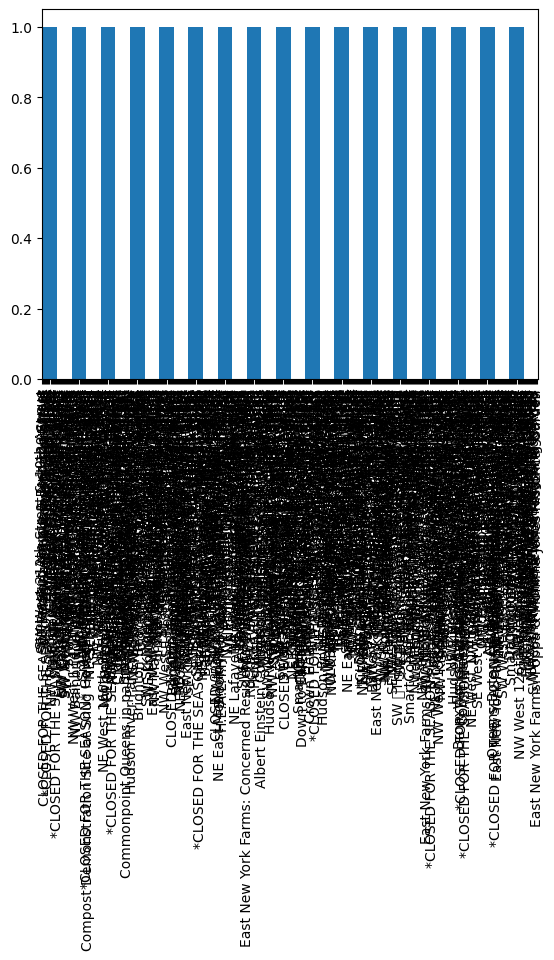

In [29]:
temp=df["food_scrap_drop_off_site"].value_counts().plot.bar()

In [30]:
#line chart for the amount of available sites in each borough
groupby_df=df.groupby("borough",as_index=False)["food_scrap_drop_off_site"].count()
fig=px.line(groupby_df,x="borough" , 
        y="food_scrap_drop_off_site",
        title="The number of food scrap drop-off sites in each borough"
        )
for trace in fig.data:
  trace.mode="markers+lines"

fig.update_xaxes(title_text="Borough")
fig.update_yaxes(title_text="# of available sites")
#fig.write_html("./test.html")#to show 1 graph in html
fig.show()

In [34]:
#bar chart for the amount of available sites in each borough
groupby_df = df.groupby("borough",as_index=False)["food_scrap_drop_off_site"].count() 
fig=px.bar(groupby_df, 
        x="borough" , 
        y="food_scrap_drop_off_site",
        color="borough",
        title="The number of food scrap drop-off sites in each borough", 
        text="food_scrap_drop_off_site" #to show the numbers in each separate bar
            )
for trace in fig.data:
  #trace.mode="markers+lines"

 fig.update_xaxes(title_text="borough") #need an indent here or else code wont work
fig.update_yaxes(title_text="# of food scrap drop-off sites in each borough")
#fig.write_html("./test.html")#to show 1 graph in html
fig.show()